In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('energy_consumption_log.csv')
df.head()

,Run,File,Energy_pkg_Joules,Energy_psys_Joules,Time_elapsed_seconds,Memory_used_kb
0,1,SVM.py,21.61,31.13,0:00.64,114588
1,2,SVM.py,20.73,29.98,0:00.62,114976
2,3,SVM.py,19.40,28.14,0:00.59,114888
3,4,SVM.py,22.49,32.79,0:00.70,114932
4,5,SVM.py,20.76,30.32,0:00.65,114812


In [4]:
df = pd.read_csv('energy_consumption_log.csv')

df['Algorithm'] = df['File'].apply(lambda x: x.split('.')[0])
df['Language'] = df['File'].apply(lambda x: 'Python' if x.endswith('.py') else 'R')

df['Time_elapsed_seconds'] = df['Time_elapsed_seconds'].apply(lambda x: float(x.split(':')[1]))

df.head()

,Run,File,Energy_pkg_Joules,Energy_psys_Joules,Time_elapsed_seconds,Memory_used_kb,Algorithm,Language
0,1,SVM.py,21.61,31.13,0.64,114588,SVM,Python
1,2,SVM.py,20.73,29.98,0.62,114976,SVM,Python
2,3,SVM.py,19.40,28.14,0.59,114888,SVM,Python
3,4,SVM.py,22.49,32.79,0.70,114932,SVM,Python
4,5,SVM.py,20.76,30.32,0.65,114812,SVM,Python


In [5]:
mean_df = df.groupby(['Algorithm', 'Language']).agg({
    'Energy_pkg_Joules': 'mean',
    'Energy_psys_Joules': 'mean',
    'Time_elapsed_seconds': 'mean',
    'Memory_used_kb': 'mean'
}).reset_index()

mean_df

,Algorithm,Language,Energy_pkg_Joules,Energy_psys_Joules,Time_elapsed_seconds,Memory_used_kb
0,KMC,Python,15.2402,27.0750,0.9806,160471.20
1,KMC,R,28.6816,49.8566,1.9024,263044.88
2,KNN,Python,11.0754,19.7514,0.7628,117580.00
3,KNN,R,22.2596,39.7924,1.5872,228488.48
4,LR,Python,15.9962,27.0260,0.8662,144060.80
5,LR,R,28.9724,50.4456,1.8762,270281.68
6,NB,Python,13.8558,23.3102,0.8958,109195.44
7,NB,R,21.7088,38.1994,1.5548,226984.24
8,RF,Python,21.2834,33.9988,1.1628,123875.44
9,RF,R,22.1870,40.1108,1.5892,228537.92


In [6]:
std_df = df.groupby(['Algorithm', 'Language']).agg({
    'Energy_pkg_Joules': 'std',
    'Energy_psys_Joules': 'std',
    'Time_elapsed_seconds': 'std',
    'Memory_used_kb': 'std'
}).reset_index()

std_df

,Algorithm,Language,Energy_pkg_Joules,Energy_psys_Joules,Time_elapsed_seconds,Memory_used_kb
0,KMC,Python,2.938375,3.577615,0.120109,209.164714
1,KMC,R,4.449151,5.731955,0.088607,256.744186
2,KNN,Python,1.585910,2.333324,0.028287,271.929162
3,KNN,R,1.849278,3.767298,0.103333,118.864395
4,LR,Python,3.841172,3.956658,0.140159,344.073082
5,LR,R,5.307609,7.709126,0.103705,171.344913
6,NB,Python,0.679256,1.078136,0.036483,241.065675
7,NB,R,0.462145,0.903552,0.040569,130.609647
8,RF,Python,2.081440,1.833810,0.111264,254.089825
9,RF,R,2.444652,5.299728,0.158961,108.195560


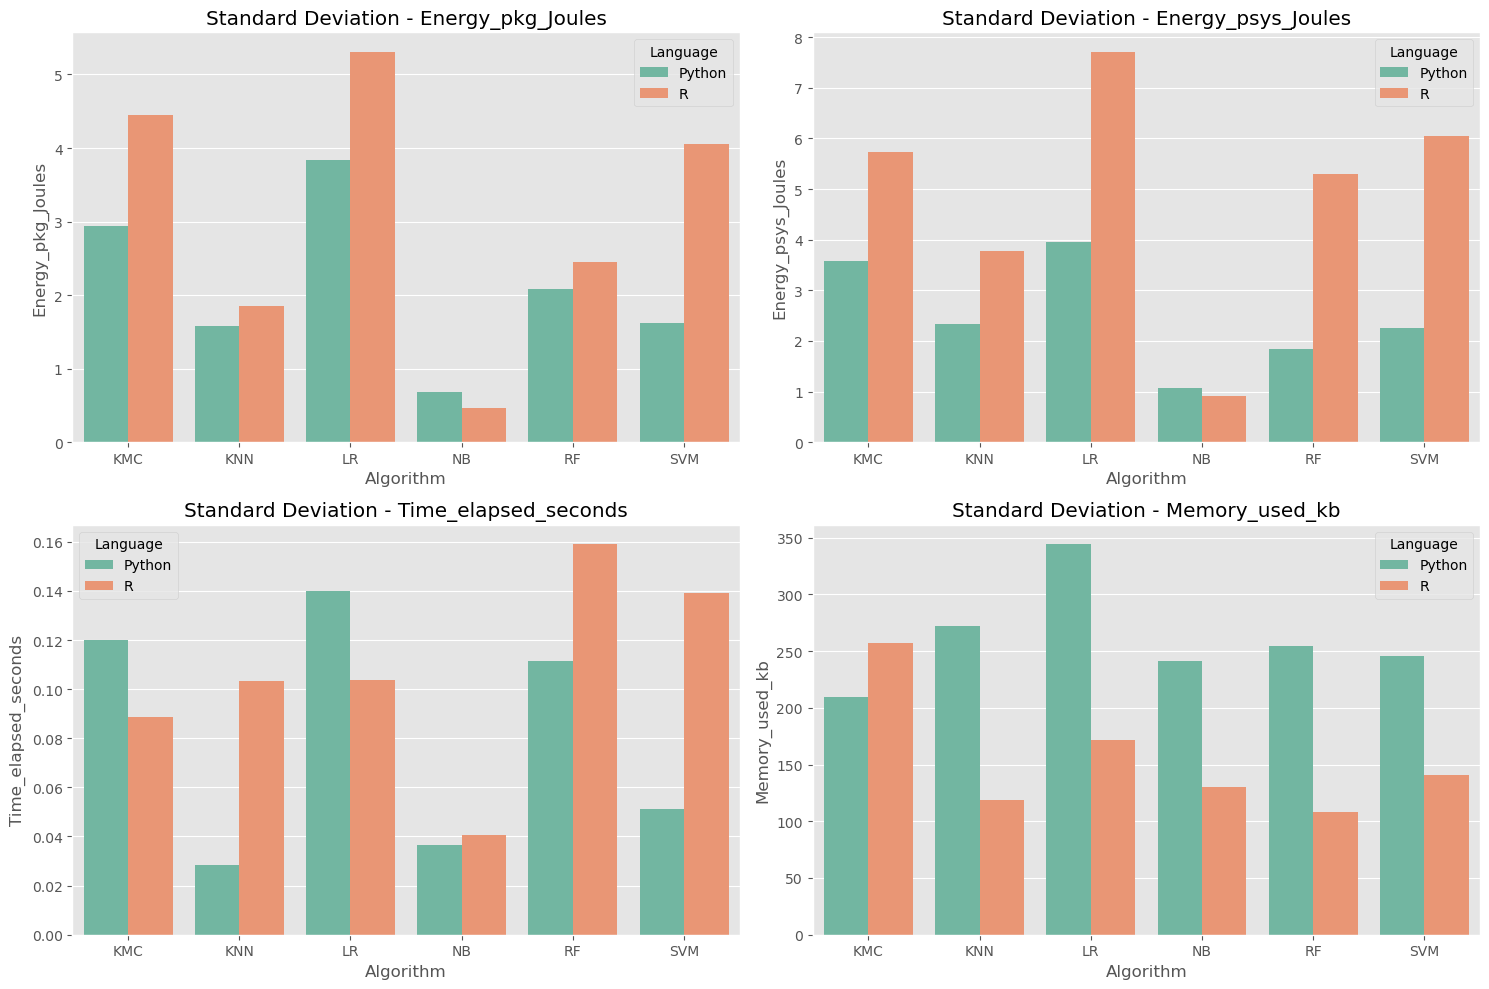

In [7]:
plt.style.use('ggplot')
sns.set_palette("Set2")

fig, ax = plt.subplots(2, 2, figsize=(15, 10))

sns.barplot(x='Algorithm', y='Energy_pkg_Joules', hue='Language', data=std_df, ax=ax[0, 0])
ax[0, 0].set_title('Standard Deviation - Energy_pkg_Joules')

sns.barplot(x='Algorithm', y='Energy_psys_Joules', hue='Language', data=std_df, ax=ax[0, 1])
ax[0, 1].set_title('Standard Deviation - Energy_psys_Joules')

sns.barplot(x='Algorithm', y='Time_elapsed_seconds', hue='Language', data=std_df, ax=ax[1, 0])
ax[1, 0].set_title('Standard Deviation - Time_elapsed_seconds')

sns.barplot(x='Algorithm', y='Memory_used_kb', hue='Language', data=std_df, ax=ax[1, 1])
ax[1, 1].set_title('Standard Deviation - Memory_used_kb')

plt.tight_layout()
plt.show()

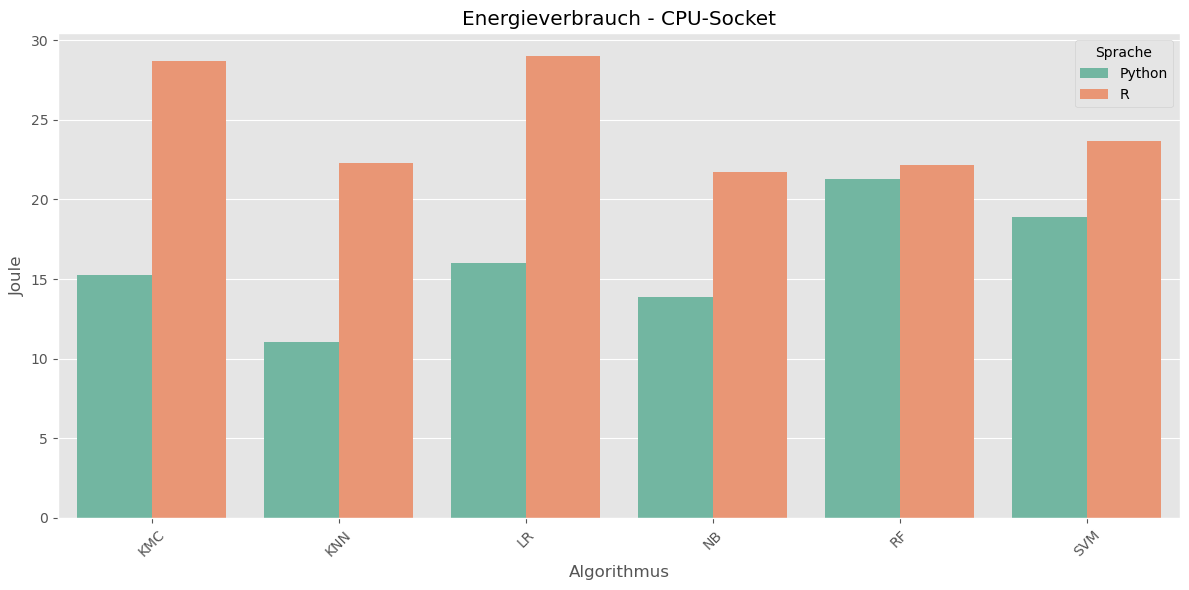

In [8]:
plt.style.use('ggplot')
sns.set_palette("Set2")

plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Energy_pkg_Joules', hue='Language', data=mean_df)
plt.title('Energieverbrauch - CPU-Socket')
plt.ylabel('Joule')
plt.xlabel('Algorithmus')
plt.xticks(rotation=45)
plt.legend(title='Sprache')
plt.tight_layout()

plt.savefig('./figures/energieverbrauch_cpu_socket.svg', format='svg')

plt.show()

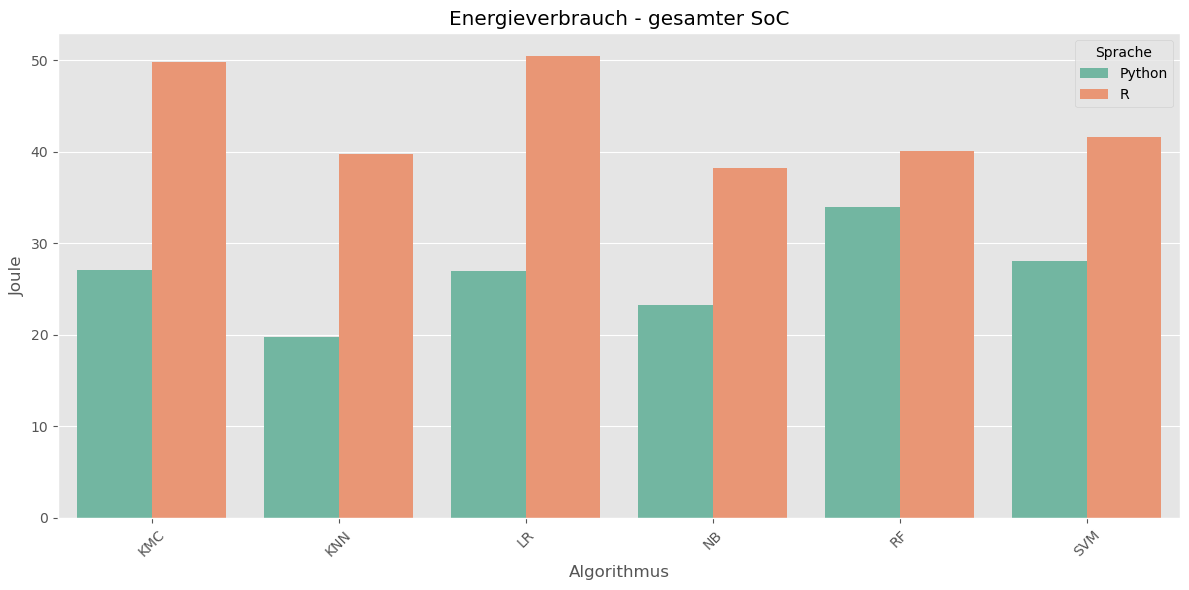

In [9]:
plt.style.use('ggplot')
sns.set_palette("Set2")

plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Energy_psys_Joules', hue='Language', data=mean_df)
plt.title('Energieverbrauch - gesamter SoC')
plt.ylabel('Joule')
plt.xlabel('Algorithmus')
plt.xticks(rotation=45)
plt.legend(title='Sprache')
plt.tight_layout()

plt.savefig('./figures/energieverbrauch_gesamter_soc.svg', format='svg')

plt.show()

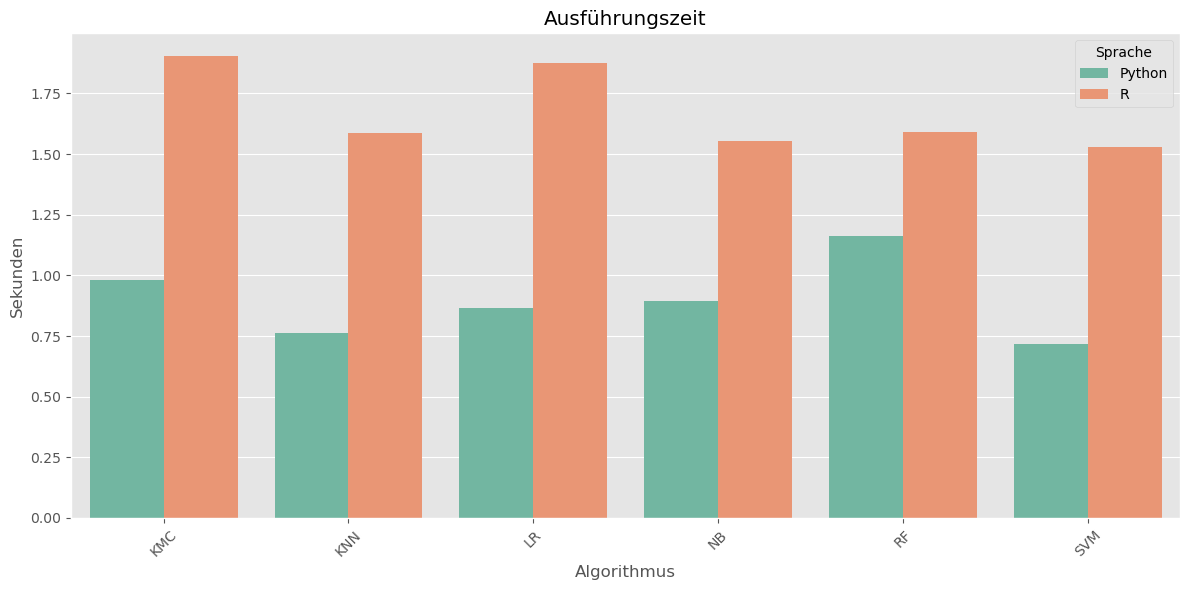

In [10]:
plt.style.use('ggplot')
sns.set_palette("Set2")

plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Time_elapsed_seconds', hue='Language', data=mean_df)
plt.title('Ausführungszeit')
plt.ylabel('Sekunden')
plt.xlabel('Algorithmus')
plt.xticks(rotation=45)
plt.legend(title='Sprache')
plt.tight_layout()

plt.savefig('./figures/ausfuehrungszeit.svg', format='svg')

plt.show()

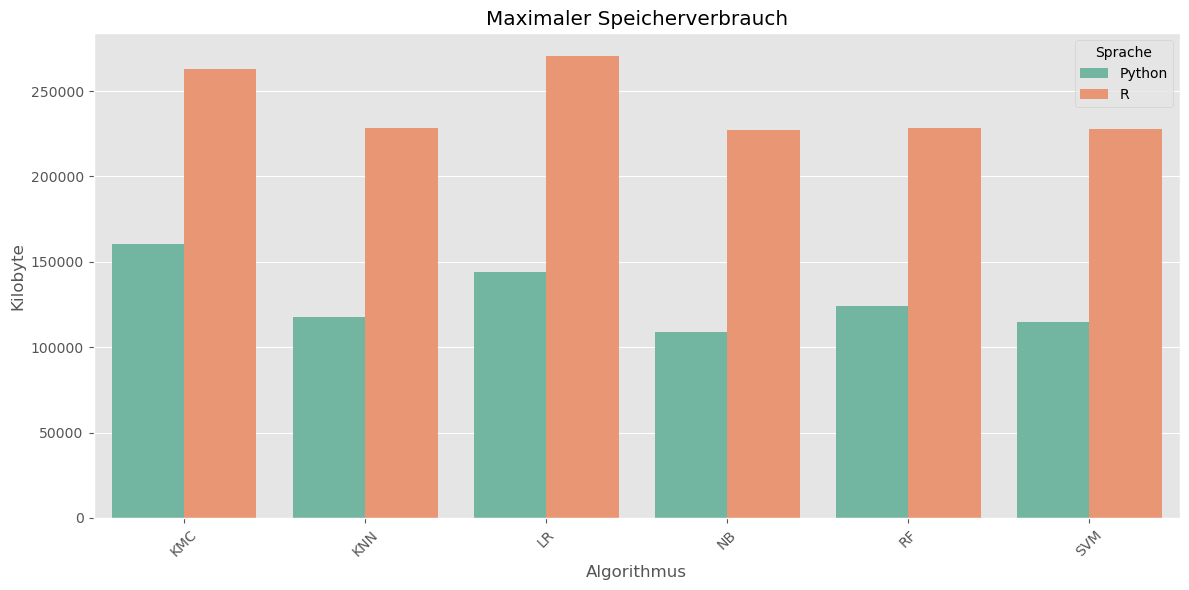

In [11]:
plt.style.use('ggplot')
sns.set_palette("Set2")

plt.figure(figsize=(12, 6))
sns.barplot(x='Algorithm', y='Memory_used_kb', hue='Language', data=mean_df)
plt.title('Maximaler Speicherverbrauch')
plt.ylabel('Kilobyte')
plt.xlabel('Algorithmus')
plt.xticks(rotation=45)
plt.legend(title='Sprache')
plt.tight_layout()

plt.savefig('./figures/maximaler_speicherverbrauch.svg', format='svg')

plt.show()

In [12]:
metrics = ['Energy_pkg_Joules', 'Energy_psys_Joules', 'Time_elapsed_seconds', 'Memory_used_kb']

normalized_data = []
for algo in mean_df['Algorithm'].unique():
    algo_data = mean_df[mean_df['Algorithm'] == algo]
    for metric in metrics:
        python_value = algo_data[algo_data['Language'] == 'Python'][metric].values[0]
        r_value = algo_data[algo_data['Language'] == 'R'][metric].values[0]
        min_value = min(python_value, r_value)
        normalized_data.append({
            'Algorithm': algo,
            'Metric': metric,
            'Python': python_value / min_value,
            'R': r_value / min_value
        })

normalized_df = pd.DataFrame(normalized_data)

normalized_df.to_csv('normalized_results.csv', index=False)

In [13]:
# Mann-Whitney-U-Test

from scipy.stats import mannwhitneyu

results = []

for algo in df['Algorithm'].unique():
    for metric in metrics:
        python_values = df[(df['Algorithm'] == algo) & (df['Language'] == 'Python')][metric]
        r_values = df[(df['Algorithm'] == algo) & (df['Language'] == 'R')][metric]
        stat, p = mannwhitneyu(python_values, r_values)
        results.append({
            'Algorithm': algo,
            'Metric': metric,
            'p-value': p
            })

results_df = pd.DataFrame(results)

# rename values in the 'Metric' column
results_df['Metric'] = results_df['Metric'].replace({
    'Energy_pkg_Joules': 'Energieverbrauch - CPU-Socket',
    'Energy_psys_Joules': 'Energieverbrauch - gesamter SoC',
    'Time_elapsed_seconds': 'Ausführungszeit',
    'Memory_used_kb': 'Maximaler Speicherverbrauch'
})

# sort the DataFrame by Algorithm and Metric
results_df = results_df.sort_values(by=['Algorithm', 'Metric']).reset_index(drop=True)

results_df

,Algorithm,Metric,p-value
0,KMC,Ausführungszeit,6.539010e-18
1,KMC,Energieverbrauch - CPU-Socket,7.046972e-18
2,KMC,Energieverbrauch - gesamter SoC,7.061292e-18
3,KMC,Maximaler Speicherverbrauch,6.999436e-18
4,KNN,Ausführungszeit,5.807792e-18
5,KNN,Energieverbrauch - CPU-Socket,7.034266e-18
6,KNN,Energieverbrauch - gesamter SoC,7.056516e-18
7,KNN,Maximaler Speicherverbrauch,5.682043e-18
8,LR,Ausführungszeit,6.738799e-18
9,LR,Energieverbrauch - CPU-Socket,5.011171e-17


In [14]:
# Variationskoeffizienten (CV)

cv_data = []

for algo in df['Algorithm'].unique():
    for metric in metrics:
        python_values = df[(df['Algorithm'] == algo) & (df['Language'] == 'Python')][metric]
        r_values = df[(df['Algorithm'] == algo) & (df['Language'] == 'R')][metric]
        cv_python = python_values.std() / python_values.mean()
        cv_r = r_values.std() / r_values.mean()
        cv_data.append({
            'Algorithm': algo,
            'Metric': metric,
            'Python': cv_python,
            'R': cv_r
            })

cv_df = pd.DataFrame(cv_data)

cv_df['Metric'] = cv_df['Metric'].replace({
    'Energy_pkg_Joules': 'Energieverbrauch - CPU-Socket',
    'Energy_psys_Joules': 'Energieverbrauch - gesamter SoC',
    'Time_elapsed_seconds': 'Ausführungszeit',
    'Memory_used_kb': 'Maximaler Speicherverbrauch'
})

cv_df = cv_df.sort_values(by=['Algorithm', 'Metric']).reset_index(drop=True)

cv_df

,Algorithm,Metric,Python,R
0,KMC,Ausführungszeit,0.122485,0.046577
1,KMC,Energieverbrauch - CPU-Socket,0.192804,0.155122
2,KMC,Energieverbrauch - gesamter SoC,0.132137,0.114969
3,KMC,Maximaler Speicherverbrauch,0.001303,0.000976
4,KNN,Ausführungszeit,0.037083,0.065104
5,KNN,Energieverbrauch - CPU-Socket,0.143192,0.083078
6,KNN,Energieverbrauch - gesamter SoC,0.118135,0.094674
7,KNN,Maximaler Speicherverbrauch,0.002313,0.000520
8,LR,Ausführungszeit,0.161809,0.055274
9,LR,Energieverbrauch - CPU-Socket,0.240130,0.183195


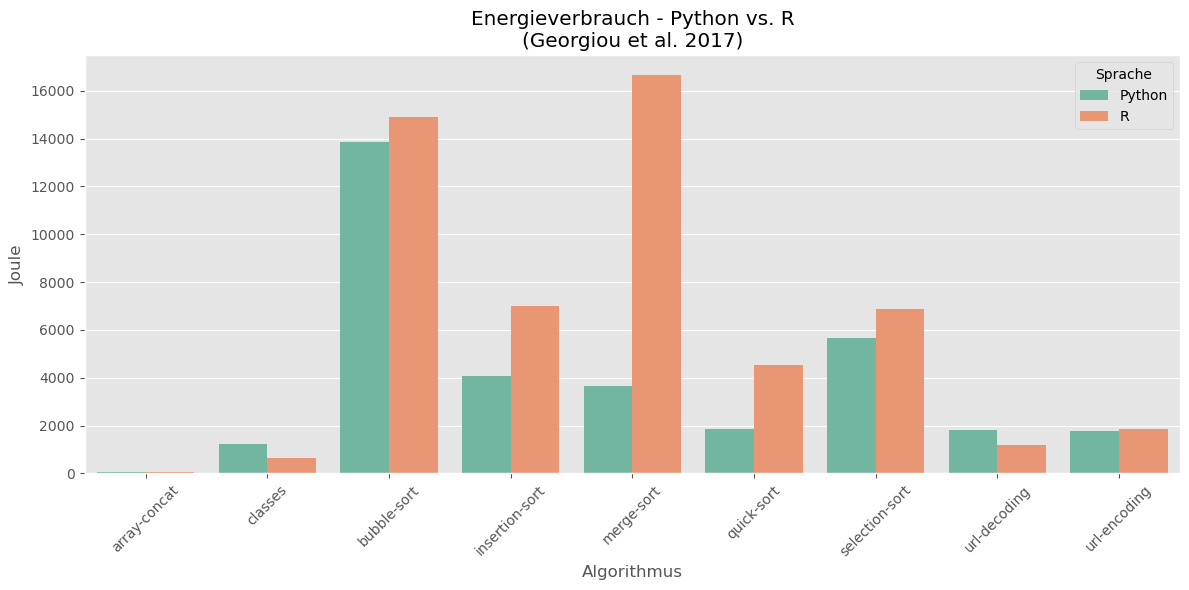

In [19]:
# Laden der Daten aus "georgiou_results_10072017.csv"
georgiou_df = pd.read_csv('georgiou_results_10072017.csv')

plt.style.use('ggplot')
sns.set_palette("Set2")

plt.figure(figsize=(12, 6))
sns.barplot(y='Value', x='Measurement', hue='Language', data=georgiou_df)
plt.title('Energieverbrauch - Python vs. R\n(Georgiou et al. 2017)')
plt.ylabel('Joule')
plt.xlabel('Algorithmus')
plt.xticks(rotation=45)
plt.legend(title='Sprache')
plt.tight_layout()

plt.savefig('./figures/energieverbrauch_georgiou2017.svg', format='svg')

plt.show()